In [95]:
import pandas as pd

In [96]:
df_ord = pd.read_csv('Orders.csv')
df_det = pd.read_csv('Details.csv')

In [97]:
df_ord.head()

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


In [98]:
df_det.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


## **ORDER preproccessing**

In [99]:
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


In [100]:
df_ord['Order Date'] = pd.to_datetime(df_ord['Order Date'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')

df_ord.head()

,Order ID,Order Date,CustomerName,State,City
0,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura
1,B-25993,2018-02-03,Madhav,Delhi,Delhi
2,B-25973,2018-01-24,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,2018-12-27,Gopal,Maharashtra,Mumbai
4,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore


In [101]:
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


In [102]:
df_ord.isna().sum()

,0
Order ID,0
Order Date,0
CustomerName,0
State,0
City,0


In [103]:
df_ord.isnull().sum()

,0
Order ID,0
Order Date,0
CustomerName,0
State,0
City,0


In [104]:
df_ord.duplicated().sum() #check duplicated rows

0

## **ORDER_DETAILS preproccessing**

In [105]:
df_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB


In [106]:
#check that all unique order id equals to order table rows
count = 0
for i in df_det['Order ID'].unique():
  count += 1
print(count)

500


In [107]:
df_det.isnull().sum()

,0
Order ID,0
Amount,0
Profit,0
Quantity,0
Category,0
Sub-Category,0
PaymentMode,0


In [108]:
df_ord.duplicated().sum() #check duplicated rows

0

In [109]:
#check negative profit
count = 0
for i in df_det['Profit'] < 0:
  if i == True:
    count += 1
print(count)

529


In [110]:
#check if we change the profit from negative to postive if it larger than 'Amount'
count = 0
for i in range(len(df_det['Profit'])):
  if df_det['Profit'][i] < 0 :
    value =  df_det['Profit'][i] * -1
    if value >= df_det['Amount'][i] :
      count += 1
print(f"number of errors : {count}")

number of errors : 21


In [111]:
# drop the 21 error and change the other profits from -ve to +ve
for i in range(len(df_det['Profit'])):
  if df_det['Profit'][i] < 0 :
    value =  df_det['Profit'][i] * -1
    if value >= df_det['Amount'][i] :
      df_det.drop(i, inplace=True)
    else:
      df_det['Profit'][i] = value
df_det.reset_index(drop=True, inplace=True)

<ipython-input-111-69c84fc69d87>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_det['Profit'][i] = value
<ipython-input-111-69c84fc69d87>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_det['Profit'][i] = value
<ipython-input-111-69c84fc69d87>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_det['Profit'][i] = value
<ipython-input-111-69c84fc69d87>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [112]:
df_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1479 non-null   object
 1   Amount        1479 non-null   int64 
 2   Profit        1479 non-null   int64 
 3   Quantity      1479 non-null   int64 
 4   Category      1479 non-null   object
 5   Sub-Category  1479 non-null   object
 6   PaymentMode   1479 non-null   object
dtypes: int64(3), object(4)
memory usage: 81.0+ KB


In [113]:
#check the unique order id again and we fount that there are 6 orders droped
count = 0
for i in df_det['Order ID'].unique():
  count += 1
print(count)

494


In [114]:
# drop the diffrence between order ID in both tables
uniq_id = df_det['Order ID'].unique()

for i in range(len(df_ord['Order ID'])):
  for j in range(len(uniq_id)):
    if uniq_id[j] == df_ord['Order ID'][i]:
      break
    elif j == len(uniq_id)-1:
      df_ord.drop(i, inplace=True)

df_ord.reset_index(drop=True, inplace=True)

In [115]:
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      494 non-null    object
 1   Order Date    494 non-null    object
 2   CustomerName  494 non-null    object
 3   State         494 non-null    object
 4   City          494 non-null    object
dtypes: object(5)
memory usage: 19.4+ KB


# **Export the two df in same file but different sheet**

In [116]:
pip install xlsxwriter

In [117]:
with pd.ExcelWriter('dataset.xlsx', engine='xlsxwriter') as writer:
    df_ord.to_excel(writer, sheet_name='Orders', index=False)
    df_det.to_excel(writer, sheet_name='Details', index=False)

## **MERGE two tables**

In [125]:
df_ord['Order Date'] = pd.to_datetime(df_ord['Order Date'], format='%Y-%m-%d')

In [126]:
merge_df = pd.merge(df_ord, df_det, on='Order ID')
merge_df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,5729,64,14,Furniture,Chairs,EMI
1,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,671,114,9,Electronics,Phones,Credit Card
2,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,443,11,1,Clothing,Saree,COD
3,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,57,7,2,Clothing,Shirt,UPI
4,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,227,48,5,Clothing,Stole,COD


In [127]:
merge_df.drop(columns=['Order ID','CustomerName'], inplace=True)
merge_df.head()

,Order Date,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,2018-03-10,Uttar Pradesh,Mathura,5729,64,14,Furniture,Chairs,EMI
1,2018-03-10,Uttar Pradesh,Mathura,671,114,9,Electronics,Phones,Credit Card
2,2018-03-10,Uttar Pradesh,Mathura,443,11,1,Clothing,Saree,COD
3,2018-03-10,Uttar Pradesh,Mathura,57,7,2,Clothing,Shirt,UPI
4,2018-03-10,Uttar Pradesh,Mathura,227,48,5,Clothing,Stole,COD


## **Visualization**

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

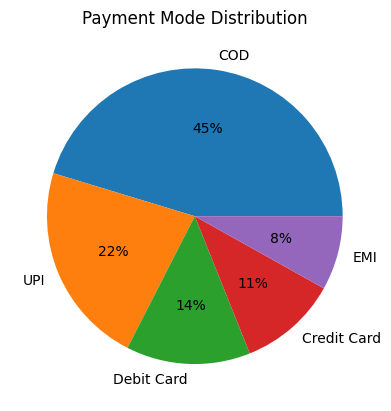

In [129]:
paymentMode_count = merge_df['PaymentMode'].value_counts()
paymentMode_count = paymentMode_count.reset_index()
paymentMode_count.columns = ['PaymentMode', 'Count']

plt.pie(paymentMode_count['Count'], labels=paymentMode_count['PaymentMode'], autopct='%1.f%%')
plt.title('Payment Mode Distribution')
plt.show()


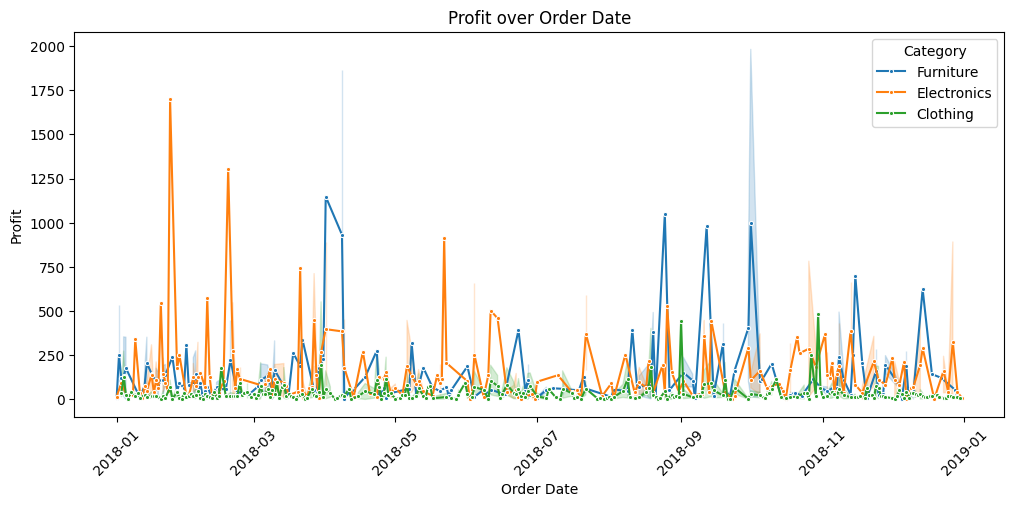

In [130]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='Order Date', y='Profit', data=merge_df, hue='Category', marker='.')

plt.title('Profit over Order Date')
plt.xlabel('Order Date')
plt.ylabel('Profit')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [131]:
city_count = merge_df['City'].value_counts()
city_count = city_count.reset_index()
city_count.columns = ['City', 'Count']
city_count['Profit'] = 0

for i in range(len(city_count['City'])):
  sum = 0
  for j in range(len(merge_df['City'])):
    if city_count['City'][i] == merge_df['City'][j]:
      sum += merge_df['Profit'][j]
  city_count['Profit'][i] = sum

city_count

<ipython-input-131-4d1a501098a6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_count['Profit'][i] = sum
<ipython-input-131-4d1a501098a6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_count['Profit'][i] = sum
<ipython-input-131-4d1a501098a6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_count['Profit'][i] = sum
<ipython-input-131-4d1a501098a6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,City,Count,Profit
0,Indore,246,15992
1,Mumbai,198,14393
2,Pune,98,10670
3,Delhi,74,4887
4,Chandigarh,69,6358
5,Bhopal,64,4894
6,Ahmedabad,62,4906
7,Patna,62,3753
8,Kolkata,61,3597
9,Bangalore,49,3184


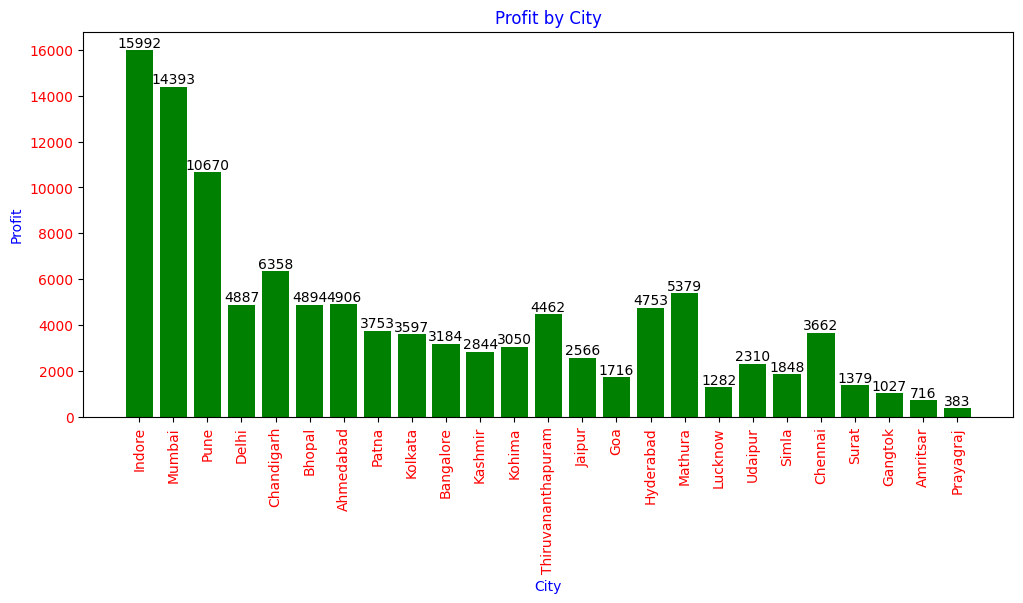

In [132]:
plt.figure(figsize=(12, 5))
bars = plt.bar(city_count['City'], city_count['Profit'],color='green')
plt.bar_label(bars)

plt.xticks(rotation=90,color = 'red')
plt.yticks(color = 'red')

plt.title('Profit by City',color='blue')
plt.xlabel('City',color='blue')
plt.ylabel('Profit',color='blue')
plt.show()